Import Libraries needed

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import r2_score

Import dataset

In [2]:
df= pd.read_csv('../input/fuel-consumption/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's explore some features of the dataset

In [3]:
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Let's plot each of these features

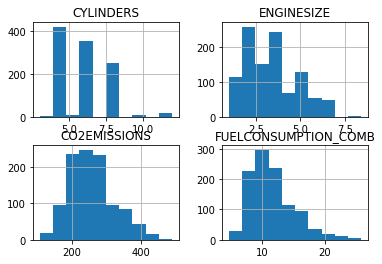

In [4]:
viz=cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

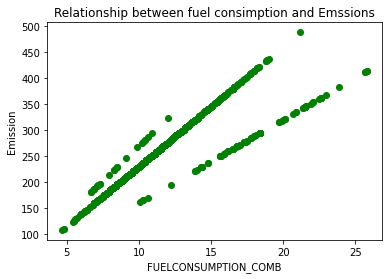

In [5]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.title('Relationship between fuel consimption and Emssions')
plt.show()

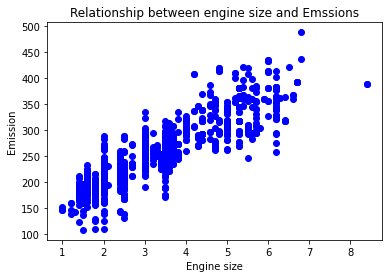

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title('Relationship between engine size and Emssions')
plt.show()

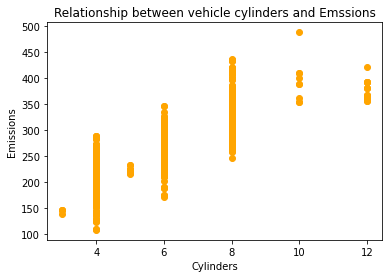

In [7]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='orange')
plt.xlabel('Cylinders')
plt.ylabel('Emissions')
plt.title('Relationship between vehicle cylinders and Emssions')
plt.show()

Now lets split the data into testing and training sets

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Training data

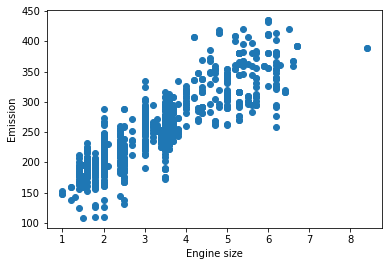

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Model data

In [10]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.87222088]]
Intercept:  [125.95466371]


Plot fit line over the data

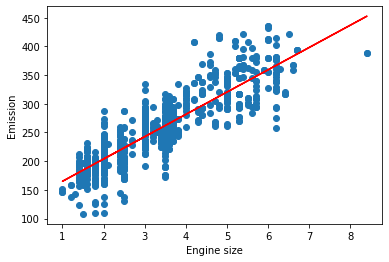

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Model Evaluation using MSE (mean squared error)

In [12]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

Mean absolute error: 21.29
Residual sum of squares (MSE): 828.56
R2-score: 0.79
